Dataset link : https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [ ]:
file_path='/content/drive/MyDrive/IPD/EmotionDatasetNLP/train.txt'
train=pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])

file_path='/content/drive/MyDrive/IPD/EmotionDatasetNLP/test.txt'
test=pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])

file_path='/content/drive/MyDrive/IPD/EmotionDatasetNLP/val.txt'
val=pd.read_csv(file_path, sep=';', header=None, names=['Text', 'Emotion'])

In [ ]:
train.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
test.head()

,Text,Emotion
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
train['Emotion'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


lemmatizer = WordNetLemmatizer()

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    pos_tags = pos_tag(words)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]
    return ' '.join(lemmatized_words)

train['Text']=train['Text'].apply(remove_stopwords)
test['Text']=test['Text'].apply(remove_stopwords)
val['Text']=val['Text'].apply(remove_stopwords)

train['Text']=train['Text'].apply(lemmatize_text)
test['Text']=test['Text'].apply(lemmatize_text)
val['Text']=val['Text'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

train['Emotion']=le.fit_transform(train['Emotion'])
val['Emotion']=le.fit_transform(val['Emotion'])
test['Emotion']=le.fit_transform(test['Emotion'])

In [ ]:
train.head()

,Text,Emotion
0,didnt feel humiliate,4
1,go feeling hopeless damn hopeful around someon...,4
2,im grab minute post feel greedy wrong,0
3,ever feel nostalgic fireplace know still property,3
4,feel grouchy,0


In [ ]:
x_train=train['Text']
y_train=train['Emotion']

x_test=test['Text']
y_test=test['Emotion']

x_val=val['Text']
y_val=val['Emotion']

# Random Forest Classifier

In [ ]:
vectorizer = CountVectorizer(max_features=3000)
RF = RandomForestClassifier(
    n_estimators=100, random_state=42, verbose=0,  # Set verbose to 0 to suppress messages
    max_depth=100, min_samples_split=100, min_samples_leaf=5, max_features='sqrt'
)

pipeline = Pipeline([
    ("vectorizer", vectorizer),
    ("classifier", RF)
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(max_features=3000)),
                ('classifier',
                 RandomForestClassifier(max_depth=100, min_samples_leaf=5,
                                        min_samples_split=100,
                                        random_state=42))])

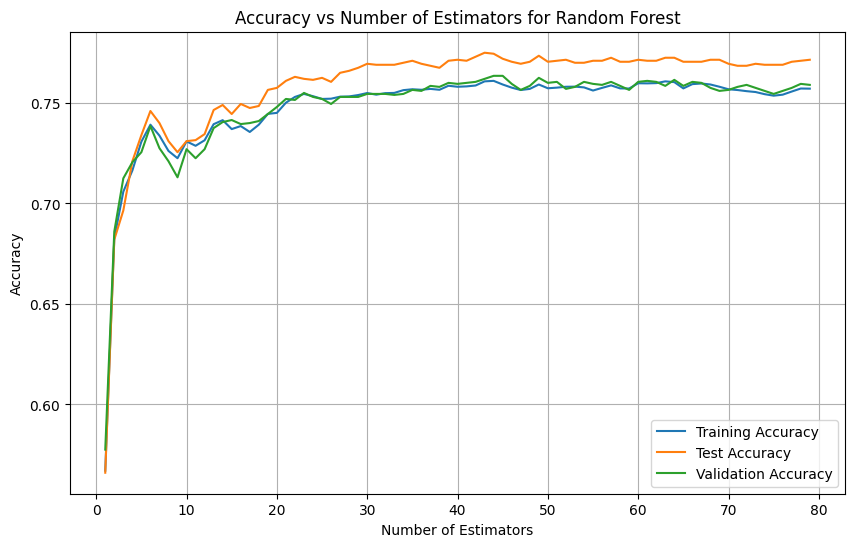

Train Accuracy: 74.79%
Test Accuracy: 75.87%
Validation Accuracy: 74.85%


In [ ]:
train_accuracies = []
test_accuracies = []
val_accuracies = []

for i in range(1, 80):
    RF.set_params(n_estimators=i)
    pipeline.fit(x_train, y_train)

    # Accuracy for training set
    train_pred = pipeline.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)


    # Accuracy for test set
    test_pred = pipeline.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)


    # Accuracy for validation set
    val_pred = pipeline.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)


plt.figure(figsize=(10, 6))
plt.plot(range(1, 80), train_accuracies, label='Training Accuracy')
plt.plot(range(1, 80), test_accuracies, label='Test Accuracy')
plt.plot(range(1, 80), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

print(f"Train Accuracy: {np.mean(train_accuracies) * 100:.2f}%")
print(f"Test Accuracy: {np.mean(test_accuracies) * 100:.2f}%")
print(f"Validation Accuracy: {np.mean(val_accuracies) * 100:.2f}%")

# Support Vector Classifier

In [ ]:
vectorizer = CountVectorizer(max_features=3000)
svc=SVC(kernel='linear',C=0.5,gamma='scale',random_state=42,verbose=0)

pipeline = Pipeline([
    ("vectorizer", vectorizer),
    ("classifier", svc)
])

pipeline.fit(x_train, y_train)
print(pipeline.named_steps['vectorizer'].vocabulary_)

{'didnt': 717, 'feel': 998, 'humiliate': 1301, 'go': 1139, 'feeling': 1000, 'hopeless': 1282, 'damn': 642, 'hopeful': 1280, 'around': 156, 'someone': 2421, 'care': 388, 'awake': 196, 'im': 1321, 'grab': 1152, 'minute': 1663, 'post': 1982, 'greedy': 1169, 'wrong': 2971, 'ever': 904, 'nostalgic': 1772, 'know': 1462, 'still': 2493, 'grouchy': 1178, 'ive': 1415, 'little': 1539, 'burden': 353, 'lately': 1480, 'wasnt': 2877, 'sure': 2566, 'take': 2592, 'time': 2679, 'recommend': 2122, 'amount': 99, 'fall': 970, 'asleep': 167, 'lot': 1565, 'faster': 982, 'also': 84, 'like': 1524, 'funny': 1103, 'confuse': 536, 'life': 1518, 'teenager': 2612, 'jade': 1416, 'year': 2981, 'old': 1816, 'man': 1597, 'perform': 1902, 'well': 2903, 'make': 1592, 'huge': 1298, 'profit': 2039, 'romantic': 2215, 'suffer': 2546, 'see': 2282, 'mean': 1618, 'something': 2422, 'run': 2230, 'divine': 771, 'experience': 937, 'expect': 933, 'type': 2765, 'spiritual': 2460, 'encounter': 862, 'think': 2654, 'easy': 830, 'dissat

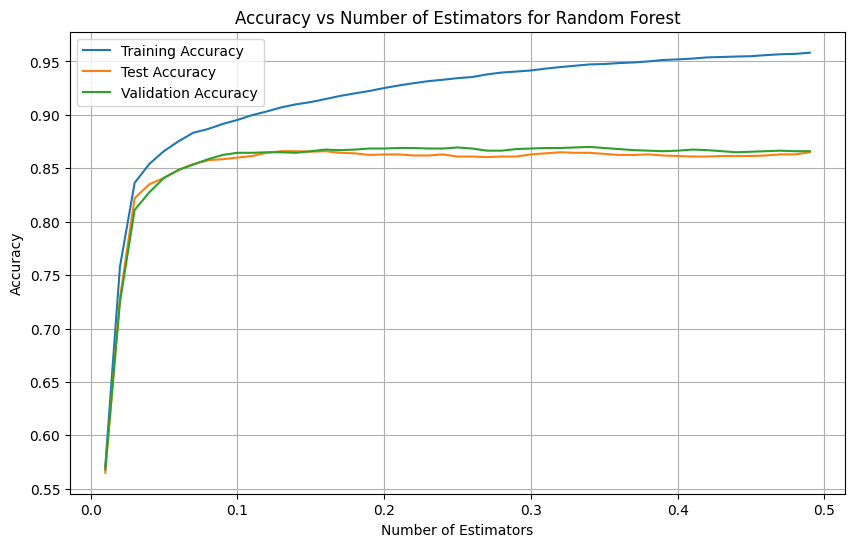

Train Accuracy: 91.59%
Test Accuracy: 85.15%
Validation Accuracy: 85.47%


In [ ]:
train_accuracies = []
test_accuracies = []
val_accuracies = []

for i in np.arange(0.01, 0.5,0.01):
    svc.set_params(C=i)
    pipeline.fit(x_train, y_train)

    # Accuracy for training set
    train_pred = pipeline.predict(x_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    train_accuracies.append(train_accuracy)


    # Accuracy for test set
    test_pred = pipeline.predict(x_test)
    test_accuracy = accuracy_score(y_test, test_pred)
    test_accuracies.append(test_accuracy)


    # Accuracy for validation set
    val_pred = pipeline.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_pred)
    val_accuracies.append(val_accuracy)


plt.figure(figsize=(10, 6))
plt.plot(np.arange(0.01,0.5,0.01), train_accuracies, label='Training Accuracy')
plt.plot(np.arange(0.01,0.5,0.01), test_accuracies, label='Test Accuracy')
plt.plot(np.arange(0.01,0.5,0.01), val_accuracies, label='Validation Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Estimators for Random Forest')
plt.legend()
plt.grid(True)
plt.show()

print(f"Train Accuracy: {np.mean(train_accuracies) * 100:.2f}%")
print(f"Test Accuracy: {np.mean(test_accuracies) * 100:.2f}%")
print(f"Validation Accuracy: {np.mean(val_accuracies) * 100:.2f}%")

In [ ]:
import pickle

file_path='/content/drive/MyDrive/IPD/EmotionNLP_SVC.pkl'
pickle.dump(svc, open(file_path, 'wb'.format(version=sklearn.__version__)))


In [ ]:

file_path = '/content/drive/MyDrive/IPD/EmotionNLP_SVC.pkl'

with open(file_path, 'rb') as file:
    loaded_pipeline = pickle.load(file)


# Deep Neural network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")

tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_val_seq = tokenizer.texts_to_sequences(x_val)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq, maxlen=50, padding='post')
x_val_pad = pad_sequences(x_val_seq, maxlen=50, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=50, padding='post')
print(f"x_test_pad shape: {x_test_pad.shape}")

x_test_pad shape: (2000, 50)


In [ ]:
tokenizer_json = tokenizer.to_json()
file_path = '/content/drive/MyDrive/IPD/tokenizer.json'

with open(file_path, 'w') as file:
    file.write(tokenizer_json)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Dropout,BatchNormalization,GlobalAveragePooling3D
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=50),
    Flatten(),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(len(le.classes_), activation='softmax')  # len(le.classes_) returns the number of unique classes
])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train_pad, y_train, epochs=100, validation_data=(x_val_pad, y_val), batch_size=10,callbacks=[early_stopping])

Epoch 1/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1830 - loss: 5.6340 - val_accuracy: 0.2660 - val_loss: 4.2960
Epoch 2/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2170 - loss: 4.7639 - val_accuracy: 0.3200 - val_loss: 3.7881
Epoch 3/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2552 - loss: 4.0851 - val_accuracy: 0.3160 - val_loss: 3.4044
Epoch 4/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2689 - loss: 3.5979 - val_accuracy: 0.3250 - val_loss: 3.0682
Epoch 5/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2834 - loss: 3.1973 - val_accuracy: 0.3225 - val_loss: 2.8027
Epoch 6/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2928 - loss: 2.8735 - val_accuracy: 0.3305 - val_loss: 2.5863
Epoch 7/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2915 - loss: 2.6322 - val_accuracy: 0.3370 - val_loss: 2.3860
Epoch 8/100
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3029 - los

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3744 - loss: 1.5590
Test Accuracy: 37.70%


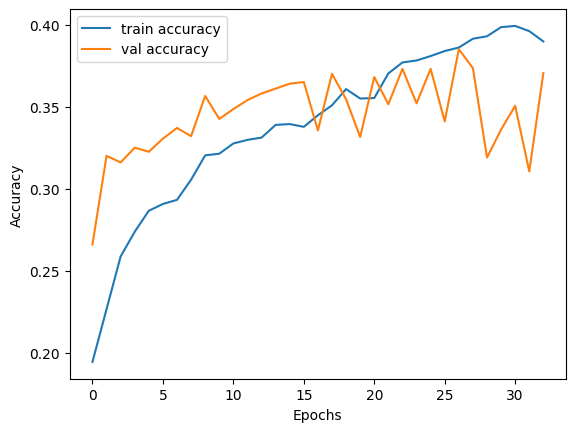

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Embedding(input_dim=10000, output_dim=64),
    Bidirectional(LSTM(128, return_sequences=True)),

    Bidirectional(LSTM(128)),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),

    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ ?                           │     0 (unbuilt) │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history = model.fit(x_train_pad, y_train, epochs=30, validation_data=(x_val_pad, y_val), batch_size=64, callbacks=[early_stopping,lr_scheduler])

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 135s 506ms/step - accuracy: 0.3194 - loss: 4.2683 - val_accuracy: 0.5670 - val_loss: 2.4467 - learning_rate: 0.0010
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 138s 489ms/step - accuracy: 0.7980 - loss: 1.4214 - val_accuracy: 0.4915 - val_loss: 1.6526 - learning_rate: 0.0010
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 481ms/step - accuracy: 0.8858 - loss: 0.7314 - val_accuracy: 0.3995 - val_loss: 2.4104 - learning_rate: 0.0010
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 144s 486ms/step - accuracy: 0.9134 - loss: 0.4526 - val_accuracy: 0.7820 - val_loss: 0.8392 - learning_rate: 0.0010
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 123s 490ms/step - accuracy: 0.9354 - loss: 0.3118 - val_accuracy: 0.4925 - val_loss: 2.1707 - learning_rate: 0.0010
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 494ms/step - accuracy: 0.9455 - loss: 0.2325 - val_accuracy: 0.7455 - val_loss: 1.0269 - learning_rate: 0.0010
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 139s 481ms/step - accura

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.8880 - loss: 0.5809
Test Accuracy: 88.50%


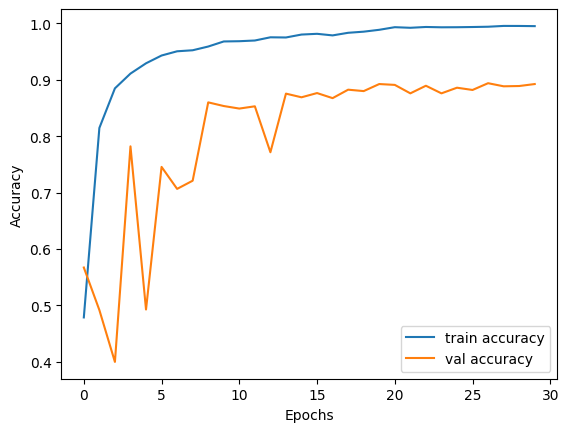

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_pad, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/IPD/EmotionNLP_LSTM.h5')

In [ ]:
print(x_test_pad[0])
input_data = x_test_pad[0]

input_data = np.expand_dims(input_data, axis=0)

predictions = model.predict(input_data)
print(predictions)

[   4    2  106  584    4 4620   45    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
1/1 ━━━━━━━━━━━━━━━━━━━━ 33s 33s/step
[[2.1785909e-05 1.1001594e-06 1.9333731e-06 3.3336553e-05 9.9994087e-01
  9.9413955e-07]]
